!["Logo"](../assets/logo.png)

Created by **Domonkos Nagy** and **Zoltán Barta**

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/Fortuz/rl_education/blob/main/2.%20MDP/gymnasium_basics.ipynb)

# Gymnasium Basics

<div><img src="./assets/gymnasium-text.png" width="300"/></div>

Gymnasium is a project that provides an API for all single agent reinforcement learning environments, and includes implementations of common environments.

The API contains four key functions: `make`, `reset`, `step` and `render`. At the core of Gymnasium is `Env`, a high-level Python class representing a Markov Decision Process (MDP) from reinforcement learning theory (this is not a perfect reconstruction, and is missing several components of MDPs). Gymnasium was originally developed by OpenAI as *Gym*, and is now maintained by the Farama Foundation.

- Documentation: https://gymnasium.farama.org/
- Source code: https://github.com/Farama-Foundation/Gymnasium

In [ ]:
# Install dependencies if running in Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install gymnasium==0.29.0

In [15]:
import gymnasium as gym  # As a best practice, Gymnasium is usually imported as 'gym'
import matplotlib.pyplot as plt
from stable_baselines3 import PPO,A2C,DQN
from IPython import display
from gymnasium.wrappers import RecordVideo
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

## Creating an Environment

The `make` function is used to initialize environments. The name of the environment and the rendering mode are passed as parameters.

Below the `CliffWalking-v0` environment is initialized: cliff walking is a very simple RL problem that involves crossing a gridworld from start to goal while avoiding falling off a cliff. 
If the agent steps into the cliff, it gets sent back to the starting position, and if it reaches the goal, the episode terminates.

The `reset` method sets the environment to its initial state, and returns two values: the starting state along with additional information complementing the state. Gymnasium has different ways of representing states, in this case, the state is simply an integer (the agent's position on the gridworld).

The `render` function renders the current state of the environment. Since we are using the `rgb_array` rendering mode, this function will return an `ndarray` that can be rendered with Matplotlib's `imshow` function.

- Documentation for the Cliff Walking environment: https://gymnasium.farama.org/environments/toy_text/cliff_walking/

The starting state is: 36


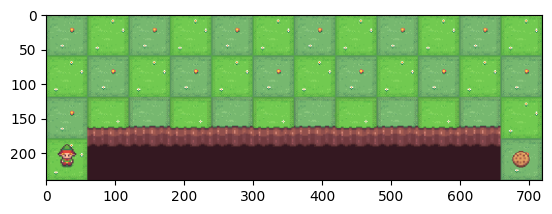

In [24]:
base_env = gym.make('CliffWalking-v0', render_mode='rgb_array')  # Create the environment

obs, info = base_env.reset()  # Set the environment to its initial state
print(f'The starting state is: {obs}')

img = plt.imshow(base_env.render())  # Render the state with matplotlib
plt.show()

## States, Actions and Rewards

To represent states and actions, Gymnasium uses *spaces*. A space is just a Python class that describes a mathematical sets and are used in Gym to specify valid actions and observations: for example, `Discrete(n)` is a space that contains `n` integer values. Gymnasium has many other spaces, but for the first few weeks, we are only going to use discrete spaces.

The set of states, $\mathcal{S}$ is represented as the *observation space* in Gymnasium. The type of the observation space varies between environments, in our case, it is `Discrete(48)`, and contains 48 integers, each corresponding to a position in the gridworld.

Similarly, the set of actions, $\mathcal{A}$ is represented by the *action space*. For this environment it is a discrete space with 4 elements, each corresponding to a possible direction (UP, RIGHT, DOWN, LEFT) in a given state.

A reward in Gymnasium is always a single number (integer or float): in this environment, the reward is -1 for all transitions, except when the agent falls into the cliff, for which the reward is -100. This essentially prompts the agent to reach the goal in the least number of steps without stepping into the cliff.

- Documentation for spaces: https://gymnasium.farama.org/api/spaces/

In [22]:
print(f'Observation space: {base_env.observation_space}')
print(f'Action space: {base_env.action_space}')

Observation space: Discrete(48)
Action space: Discrete(4)


## Interacting with the Environment

The `step` function is used to take an action. It has a single parameter, `action`, which is an element of the action space.
When the function is called, the agent takes the action, the environment transitions into the next state, and 5 values are returned:

- `observation` - An element of the environment’s `observation_space` as the next observation due to the agent actions.
- `reward` - The reward as a result of taking the action.
- `terminated` - Whether the agent reaches the terminal state (as defined under the MDP of the task).
- `truncated` - Whether the truncation condition outside the scope of the MDP is satisfied. Typically, this is a timelimit, but could also be used to indicate an agent physically going out of bounds. 
- `info` - Contains auxiliary diagnostic information (helpful for debugging, learning, and logging).

Observation: 12
Reward: -1
Terminated: False
Truncated: False
Info: {'prob': 1.0}


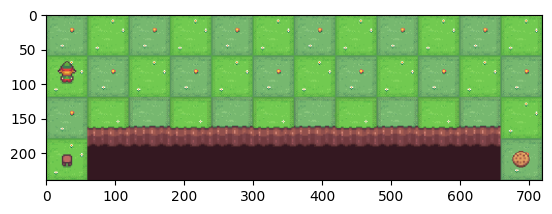

In [26]:
action = 0  # = UP
obs, reward, terminated, truncated, info = base_env.step(action)  # Take the action

# Print return values
print(f'Observation: {obs}')
print(f'Reward: {reward}')
print(f'Terminated: {terminated}')
print(f'Truncated: {truncated}')
print(f'Info: {info}')

# Render new state
img = plt.imshow(base_env.render())
plt.show()

## Simulating an Episode

Gymnasium Wrappers can be applied to an environment to modify or extend its behavior: for example, the `RecordVideo` wrapper records episodes as videos into a folder.
We will use this wrapper throughout the course to record episodes at certain steps of the training process, in order to observe how the agent is learning.

The `sample` method of the action space will select an action at random. Using this function, we can simulate an episode where the agent moves randomly
at each time step. The `close` method shuts down the environment at the end.

Here we simulate an episode and render the result as a playable video:

In [27]:
# Initialize environment
env = RecordVideo(base_env, video_folder="./videos", disable_logger=True)
done = False

obs, info = env.reset()
t = 0
max_steps = 200

# Simulate an episode
while not done:

    # Take a random action
    action = env.action_space.sample()
    new_obs, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated or t > max_steps
    t += 1

# Close environment
env.close()

# Render recording
widgets.Video.from_file(f'./videos/rl-video-episode-0.mp4', autoplay=False, loop=False, width=700)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', autoplay='False',…

## MDPs vs. Gymnasium

Here is a comparison of MDPs and their representation in Gymnasium, using the same variable names as above. Note that while these concepts relate to each other, they are not equivalent.

| Markov Decision Processes | Gymnasium |
| --- | --- |
| MDP | `Env` |
| $A_t$ | `action` |
| $S_{t+1}$ | `new_obs` |
| $R_{t+1}$ | `reward` |
| $\mathcal{A}$ (set of all actions) | `Env.action_space` |
| $\mathcal{S}$ (set of all states) | `Env.observation_space` |
| $\mathcal{R}$ (set of all rewards) | `Env.reward_range`, usually $(-\infty,+\infty)$ |

In [ ]:


# Create the base environment
base_env = gym.make('CliffWalking-v0', render_mode='rgb_array')

# Wrap the environment for training
env = base_env

# Train the PPO model
model = PPO("MlpPolicy", env, verbose=1)

model.learn(total_timesteps=500_000)


# Wrap the environment for recording
recorded_env = ŗ(base_env, name_prefix="solved",video_folder="./videos")

# Reset the environment
obs, info = recorded_env.reset()
done = False
t = 0
max_steps = 200
rewards = []
# Simulate an episode using the trained model
while not done:
    action, _ = model.predict(obs)  # Use the trained model to select an action
    obs, reward, terminated, truncated, info = recorded_env.step(int(action))
    rewards.append(reward)
    done = terminated or truncated or t > max_steps
    t += 1

# Close the environment
recorded_env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 8896 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 5939         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0057767117 |
|    clip_fraction        | 0.0416       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.000808     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.56e+04     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0188      |
|    val

In [21]:

# Render recording
widgets.Video.from_file(f'./videos/solved-episode-0.mp4', autoplay=False, loop=False, width=700)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', autoplay='False',…